In [41]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Rows

In [42]:
rc = Table(['Name', 'Park', 'Type', 'Number of Rides'])
rc

Name | Park | Type | Number of Rides

In [43]:
rc = rc.with_row(['The Phoenix', 'Knoebels', 'Wooden', 47])
rc

Name        | Park     | Type   | Number of Rides
The Phoenix | Knoebels | Wooden | 47

In [44]:
rc = rc.with_row(['Twister', 'Knoebels', 'Wooden', 12]).with_row(['Impulse', 'Knoebels', 'Steel', 2])
rc

Name        | Park     | Type   | Number of Rides
The Phoenix | Knoebels | Wooden | 47
Twister     | Knoebels | Wooden | 12
Impulse     | Knoebels | Steel  | 2

In [46]:
rc = rc.with_row(["Nitro", "Six Flags Great Adventure", "Steel", 3])
rc

Name        | Park                      | Type   | Number of Rides
The Phoenix | Knoebels                  | Wooden | 47
Twister     | Knoebels                  | Wooden | 12
Impulse     | Knoebels                  | Steel  | 2
Nitro       | Six Flags Great Adventure | Steel  | 3

In [47]:
rc = rc.with_row(["Kingda Ka", "Six Flags Great Adventure", "Steel", 0])
rc

Name        | Park                      | Type   | Number of Rides
The Phoenix | Knoebels                  | Wooden | 47
Twister     | Knoebels                  | Wooden | 12
Impulse     | Knoebels                  | Steel  | 2
Nitro       | Six Flags Great Adventure | Steel  | 3
Kingda Ka   | Six Flags Great Adventure | Steel  | 0

In [48]:
rc = rc.relabeled('Number of Rides', 'Num Rides')
rc

Name        | Park                      | Type   | Num Rides
The Phoenix | Knoebels                  | Wooden | 47
Twister     | Knoebels                  | Wooden | 12
Impulse     | Knoebels                  | Steel  | 2
Nitro       | Six Flags Great Adventure | Steel  | 3
Kingda Ka   | Six Flags Great Adventure | Steel  | 0

In [49]:
rc.where('Type', 'Wooden')

Name        | Park     | Type   | Num Rides
The Phoenix | Knoebels | Wooden | 47
Twister     | Knoebels | Wooden | 12

In [50]:
rc.where(3, 2)

Name    | Park     | Type  | Num Rides
Impulse | Knoebels | Steel | 2

In [51]:
rc.where(3, are.above(10))

Name        | Park     | Type   | Num Rides
The Phoenix | Knoebels | Wooden | 47
Twister     | Knoebels | Wooden | 12

In [52]:
rc.take(0)

Name        | Park     | Type   | Num Rides
The Phoenix | Knoebels | Wooden | 47

In [53]:
rc.take(np.arange(0,3,2))

Name        | Park     | Type   | Num Rides
The Phoenix | Knoebels | Wooden | 47
Impulse     | Knoebels | Steel  | 2

In [54]:
rc.take([0,2])

Name        | Park     | Type   | Num Rides
The Phoenix | Knoebels | Wooden | 47
Impulse     | Knoebels | Steel  | 2

In [55]:
help(are)

Help on class are in module datascience.predicates:

class are(builtins.object)
 |  Predicate functions. The class is named "are" for calls to where.
 |  
 |  For example, given a table, predicates can be used to pick rows as follows.
 |  
 |  >>> from datascience import Table
 |  >>> t = Table().with_columns([
 |  ...    'Sizes', ['S', 'M', 'L', 'XL'],
 |  ...    'Waists', [30, 34, 38, 42],
 |  ... ])
 |  >>> t.where('Sizes',  are.equal_to('L'))
 |  Sizes | Waists
 |  L     | 38
 |  >>> t.where('Waists', are.above(38))
 |  Sizes | Waists
 |  XL    | 42
 |  >>> t.where('Waists', are.above_or_equal_to(38))
 |  Sizes | Waists
 |  L     | 38
 |  XL    | 42
 |  >>> t.where('Waists', are.below(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  >>> t.where('Waists', are.below_or_equal_to(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  L     | 38
 |  >>> t.where('Waists', are.strictly_between(30, 38))
 |  Sizes | Waists
 |  M     | 34
 |  >>> t.where('Waists', are.between(30,

#### Discussion

In [56]:
nba = Table.read_table('nba2019-20.csv')
nba.show(20)

In [57]:
nba = nba.relabeled(1, 'name').relabeled(3, 'salary')
nba

team                  | name              | position | salary
Orlando Magic         | Aaron Gordon      |  PF      | 19.8636
Indiana Pacers        | Aaron Holiday     |  PG      | 2.3292
Houston Rockets       | Aaron Jackson     |  F       | 1.37824
Oklahoma City Thunder | Abdel Nader       |  SF      | 1.61852
Washington Wizards    | Admiral Schofield |  SG      | 1
Philadelphia 76ers    | Al Horford        |  PF      | 28
Philadelphia 76ers    | Alec Burks        |  SG      | 1.62056
Golden State Warriors | Alen Smailagic    |  PF      | 0.89831
Oklahoma City Thunder | Alex Abrines      |  G       | 5.45524
Los Angeles Lakers    | Alex Caruso       |  SG      | 2.75
... (518 rows omitted)

Create an array containing the names of all point guards (PG) who make more than $15M/year

In [65]:
pg_above = nba.where('position',are.containing('PG')).where('salary', are.above(15)).column('name')
pg_above

array(['Brandon Knight', 'Chris Paul', 'Damian Lillard',
       'Dennis Schroder', 'Eric Bledsoe', 'Goran Dragic', 'Jeff Teague',
       'John Wall', 'Kemba Walker', 'Kyle Lowry', 'Kyrie Irving',
       'Malcolm Brogdon', 'Mike Conley', 'Ricky Rubio',
       'Russell Westbrook', 'Stephen Curry', 'Terry Rozier',
       'Zach LaVine'], dtype='<U24')

Give a table containing the name, team, and salary of all players whose name contains the letter 'i', whose team contains the letter 'o', and whose salary was less than $1M/year

In [67]:
mytable = nba.where('name', are.containing('i')).where('team', are.containing('o')).where('salary', are.below(1)).drop('position')
mytable

team                  | name             | salary
Golden State Warriors | Alen Smailagic   | 0.89831
Washington Wizards    | Anzejs Pasecniks | 0.482144
Charlotte Hornets     | Caleb Martin     | 0.89831
Houston Rockets       | Chris Clemons    | 0.563347
Golden State Warriors | Damion Lee       | 0.842327
Chicago Bulls         | Daniel Gafford   | 0.89831
Brooklyn Nets         | David Nwaba      | 0.903111
Golden State Warriors | Eric Paschall    | 0.89831
New York Knicks       | Ignas Brazdeikis | 0.89831
Orlando Magic         | Isaiah Briscoe   | 0.838464
... (12 rows omitted)

What was the average salary?

In [69]:
np.average(nba.column('salary'))

7.286796914772727

## Census

In [70]:
full = Table.read_table('nc-est2015-agesex-res.csv')
full

SEX  | AGE  | CENSUS2010POP | ESTIMATESBASE2010 | POPESTIMATE2010 | POPESTIMATE2011 | POPESTIMATE2012 | POPESTIMATE2013 | POPESTIMATE2014 | POPESTIMATE2015
0    | 0    | 3944153       | 3944160           | 3951330         | 3963087         | 3926540         | 3931141         | 3949775         | 3978038
0    | 1    | 3978070       | 3978090           | 3957888         | 3966551         | 3977939         | 3942872         | 3949776         | 3968564
0    | 2    | 4096929       | 4096939           | 4090862         | 3971565         | 3980095         | 3992720         | 3959664         | 3966583
0    | 3    | 4119040       | 4119051           | 4111920         | 4102470         | 3983157         | 3992734         | 4007079         | 3974061
0    | 4    | 4063170       | 4063186           | 4077551         | 4122294         | 4112849         | 3994449         | 4005716         | 4020035
0    | 5    | 4056858       | 4056872           | 4064653         | 4087709         | 4132242         | 4123626         | 4006900         | 4018158
0    | 6    | 4066381       | 4066412           | 4073013         | 4074993         | 4097605         | 4142916         | 4135930         | 4019207
0    | 7    | 4030579       | 4030594           | 4043046         | 4083225         | 4084913         | 4108349         | 4155326         | 4148360
0    | 8    | 4046486       | 4046497           | 4025604         | 4053203         | 4093177         | 4095711         | 4120903         | 4167887
0    | 9    | 4148353       | 4148369           | 4125415         | 4035710         | 4063152         | 4104072         | 4108349         | 4133564
... (296 rows omitted)

In [71]:
full.where(1, 0)

SEX  | AGE  | CENSUS2010POP | ESTIMATESBASE2010 | POPESTIMATE2010 | POPESTIMATE2011 | POPESTIMATE2012 | POPESTIMATE2013 | POPESTIMATE2014 | POPESTIMATE2015
0    | 0    | 3944153       | 3944160           | 3951330         | 3963087         | 3926540         | 3931141         | 3949775         | 3978038
1    | 0    | 2014276       | 2014278           | 2018420         | 2028427         | 2007717         | 2009528         | 2020326         | 2035134
2    | 0    | 1929877       | 1929882           | 1932910         | 1934660         | 1918823         | 1921613         | 1929449         | 1942904

In [72]:
partial = full.select(['SEX', 'AGE', 4, 8])
partial

SEX  | AGE  | POPESTIMATE2010 | POPESTIMATE2014
0    | 0    | 3951330         | 3949775
0    | 1    | 3957888         | 3949776
0    | 2    | 4090862         | 3959664
0    | 3    | 4111920         | 4007079
0    | 4    | 4077551         | 4005716
0    | 5    | 4064653         | 4006900
0    | 6    | 4073013         | 4135930
0    | 7    | 4043046         | 4155326
0    | 8    | 4025604         | 4120903
0    | 9    | 4125415         | 4108349
... (296 rows omitted)

In [73]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2014')
simple

SEX  | AGE  | 2010    | 2014
0    | 0    | 3951330 | 3949775
0    | 1    | 3957888 | 3949776
0    | 2    | 4090862 | 3959664
0    | 3    | 4111920 | 4007079
0    | 4    | 4077551 | 4005716
0    | 5    | 4064653 | 4006900
0    | 6    | 4073013 | 4135930
0    | 7    | 4043046 | 4155326
0    | 8    | 4025604 | 4120903
0    | 9    | 4125415 | 4108349
... (296 rows omitted)

In [74]:
partial.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

What does AGE 999 mean?

In [75]:
partial.where('AGE', 999)

SEX  | AGE  | POPESTIMATE2010 | POPESTIMATE2014
0    | 999  | 309346863       | 318907401
1    | 999  | 152088043       | 156955337
2    | 999  | 157258820       | 161952064

Which age groups have populations that are changing fastest?

In [76]:
census = simple.with_columns(
        'Change', simple.column(3) - simple.column(2), 
        'Growth', (simple.column(3) / simple.column(2)) ** (1/4) - 1)
census

SEX  | AGE  | 2010    | 2014    | Change  | Growth
0    | 0    | 3951330 | 3949775 | -1555   | -9.83991e-05
0    | 1    | 3957888 | 3949776 | -8112   | -0.000512789
0    | 2    | 4090862 | 3959664 | -131198 | -0.00811602
0    | 3    | 4111920 | 4007079 | -104841 | -0.00643608
0    | 4    | 4077551 | 4005716 | -71835  | -0.0044337
0    | 5    | 4064653 | 4006900 | -57753  | -0.00357123
0    | 6    | 4073013 | 4135930 | 62917   | 0.00383965
0    | 7    | 4043046 | 4155326 | 112280  | 0.00687163
0    | 8    | 4025604 | 4120903 | 95299   | 0.00586648
0    | 9    | 4125415 | 4108349 | -17066  | -0.00103581
... (296 rows omitted)

In [77]:
census.set_format('Growth', PercentFormatter)
census.set_format([2, 3, 4], NumberFormatter)

SEX  | AGE  | 2010      | 2014      | Change   | Growth
0    | 0    | 3,951,330 | 3,949,775 | -1,555   | -0.01%
0    | 1    | 3,957,888 | 3,949,776 | -8,112   | -0.05%
0    | 2    | 4,090,862 | 3,959,664 | -131,198 | -0.81%
0    | 3    | 4,111,920 | 4,007,079 | -104,841 | -0.64%
0    | 4    | 4,077,551 | 4,005,716 | -71,835  | -0.44%
0    | 5    | 4,064,653 | 4,006,900 | -57,753  | -0.36%
0    | 6    | 4,073,013 | 4,135,930 | 62,917   | 0.38%
0    | 7    | 4,043,046 | 4,155,326 | 112,280  | 0.69%
0    | 8    | 4,025,604 | 4,120,903 | 95,299   | 0.59%
0    | 9    | 4,125,415 | 4,108,349 | -17,066  | -0.10%
... (296 rows omitted)

How do the age distributions of men and women differ?

In [78]:
males = census.where('SEX', 1).where('AGE', are.below(999))
females = census.where('SEX', 2).where('AGE', are.below(999))

In [79]:
females.sort('2014', descending=True).show(5)

In [80]:
males.sort('2014', descending=True).show(5)

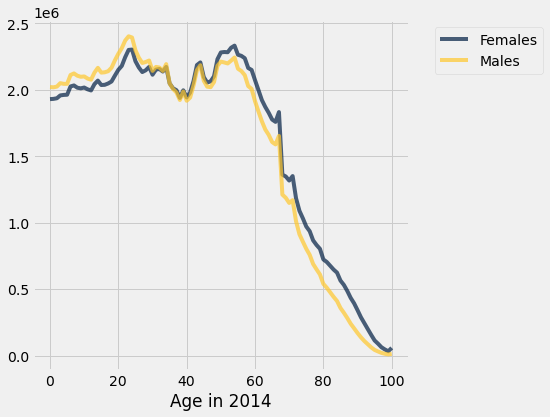

In [81]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Females', females.column('2014'),
    'Males', males.column('2014'),
).plot('Age in 2014')

In [82]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Ratio', females.column('2014') / males.column('2014'),
).plot('Age in 2014')

In [ ]:
females.where('Change', are.above(350000)).sort('AGE').show()

In [ ]:
females.where('AGE', are.between(55, 70)).show()

In [ ]:
2014 - make_array(67, 66, 65, 64)